In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("games.csv")

# Lichess Game Dataset 

This set contains over 20'000 games from a selection of users on the website lichess.org.  
A lot of information can be analyzed during a chess game. This provides many opportunities for data analysis.  

In [3]:
df.head(3)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   
2           5+10    ischia          1496       a-00          1500   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3

## List of columns (16):

- __Game ID:__ str
- __Rated (T/F):__ bool
    - Is the game rated?
- __Start Time:__ float64
- __End Time:__ float64
- __Number of Turns:__ int64
- __Game Status:__ str
    - How did the game end?
- __Winner:__ str
    - Which side won?
- __Time Increment:__ str
- __White Player ID:__ str
- __White Player Rating:__ int64
- __Black Player ID:__ str
- __Black Player Rating:__ int64
- __All Moves in Standard Chess Notation:__ str
- __Opening Eco (Standardised Code for any given opening, [list here](https://www.365chess.com/eco.php)):__ str
- __Opening Name:__ str
- __Opening Ply (Number of moves in the opening phase):__ int64

## Interesting columns
Some of the most interesting columns comprehend:
- __Opening Name:__ Contains the opener name that was performed during the first and second moves
- __White/Black rating:__ rating of players
- __Number of turns:__ how many turns did it take to end the game

## Possible analysis/ideas
### Favorite opening
Using the opener column it would be nice to know which openers are most used by high ranking players (2000+ rating)
It allows us to view different victory percentages or even see if a specific opener has a higher chance of winning if played by white or black for example.  
### Opening leading to victory
Count of openings which lead to a win for black and white
### Rating distribution
Using black and white rating, while checking for duplicates using their id, to see the rating distribution over the 20'000+ games
### Matchmaking fairness
Calculating the rating difference distribution to check whether the matchmaking systems puts equal rated players against eachother
### Winner prediction*
Predicting the winner of a game taking into account the color of the player (black/white), their rank and opener

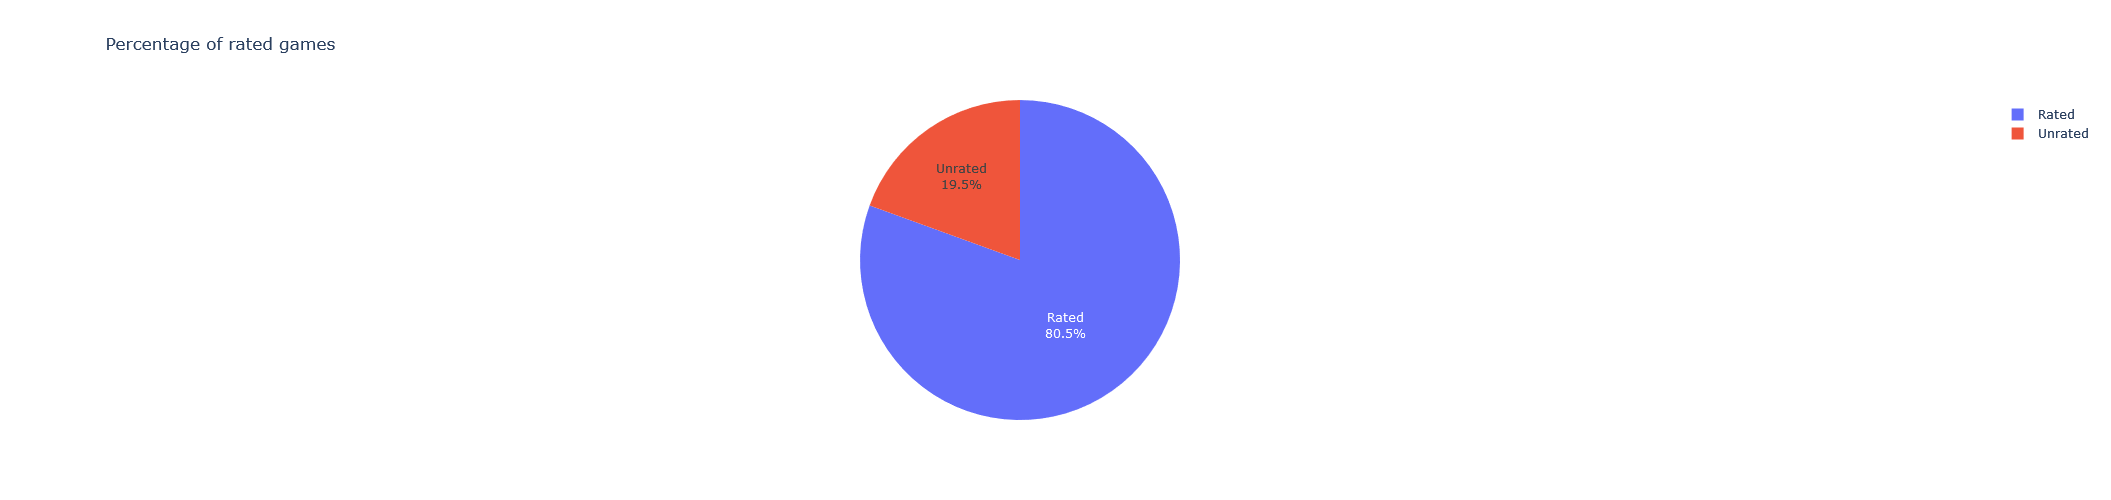

In [205]:
rated_counts = df["rated"].apply(lambda x: "Rated" if x==True else "Unrated")
fig = px.pie(rated_counts, names="rated", title="Percentage of rated games")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

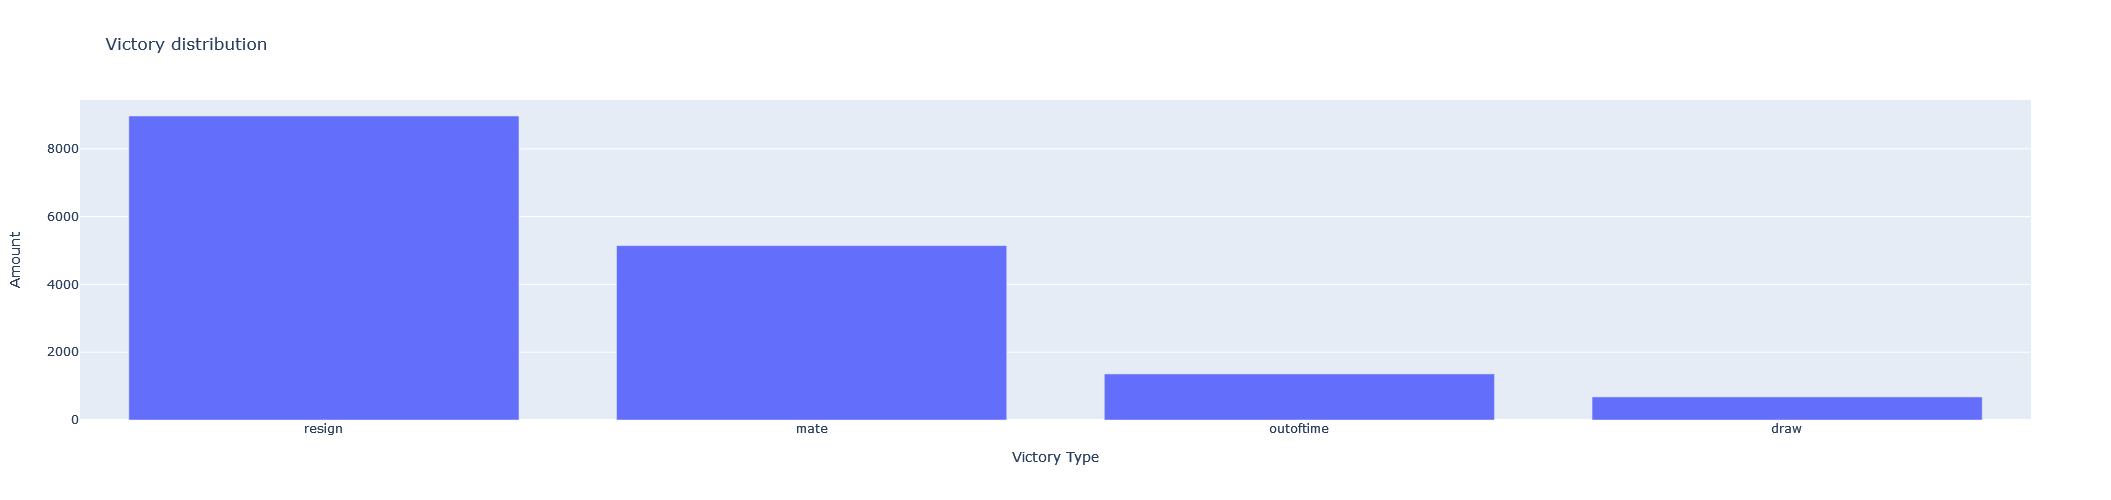

In [5]:
tidy = df.groupby("victory_status").sum().reset_index()
fig = px.bar(tidy, x="victory_status", y="rated", title="Victory distribution", labels={"victory_status": "Victory Type", "rated":"Amount"})
fig.update_layout(autosize=False, width=500, height=500, xaxis={'categoryorder':'total descending'})
fig.show()

## Nr of turns distribution

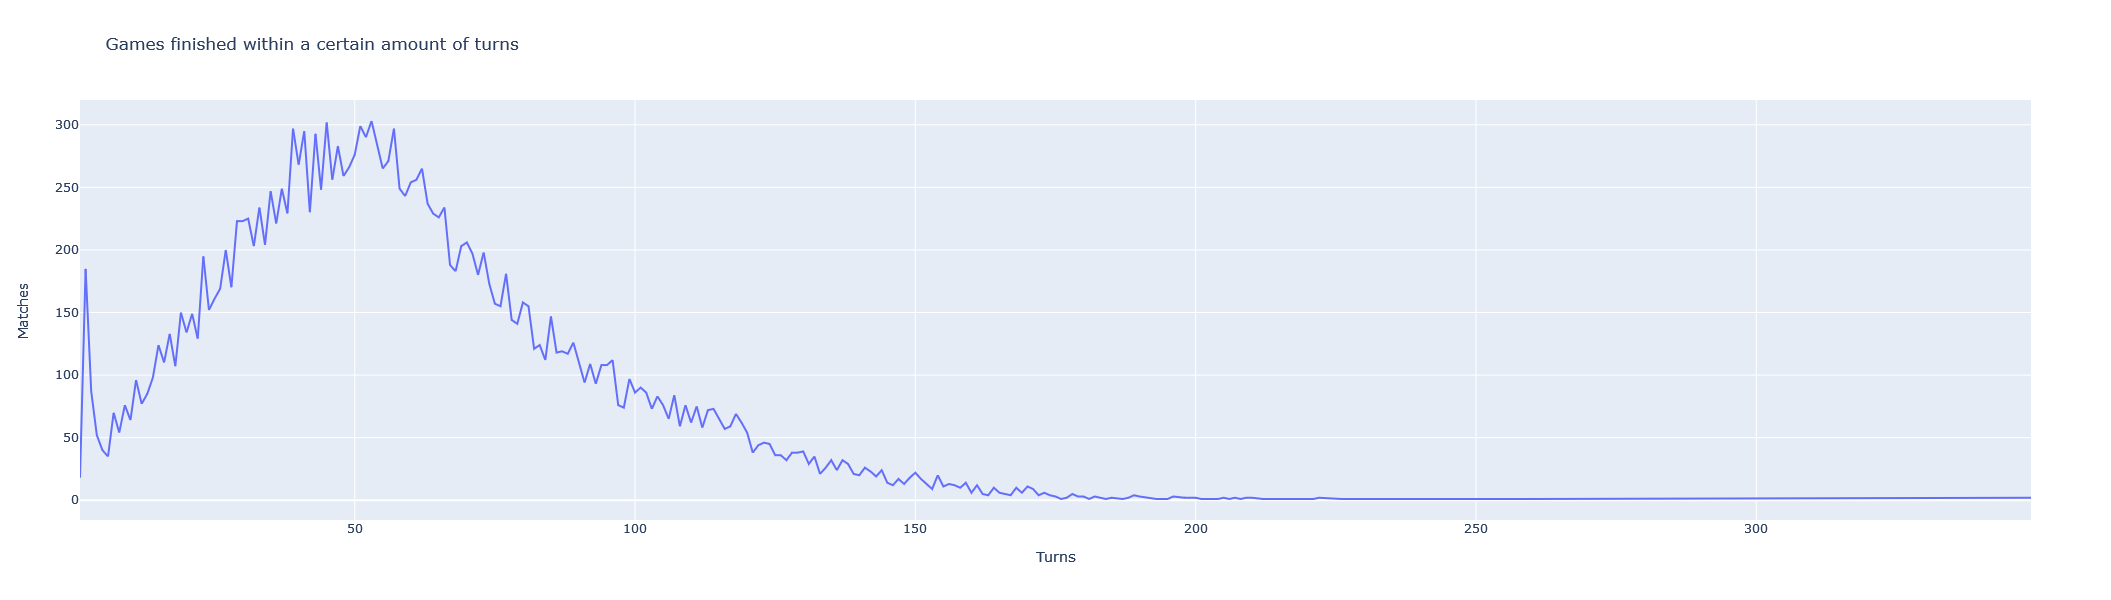

In [197]:
turnDiff = df.groupby("turns")["id"].count()
fig = px.line(turnDiff, title="Games finished within a certain amount of turns", labels={"value":"Matches", "turns":"Turns"})
fig.update_layout(autosize=False, width=1200, height=600, showlegend=False)
fig.show()

## Rating brackets
For starters, we should see for every 100 of rating how many people there are

In [7]:
rated_df = df.copy()
col = rated_df["rated"]
rated_df = rated_df.loc[col == True]

df["avg_rating"] = (df["black_rating"] + df["white_rating"])/2
print("avg min rating:", df["avg_rating"].min())
print("avg max rating:", df["avg_rating"].max())

avg min rating: 816.5
avg max rating: 2475.5


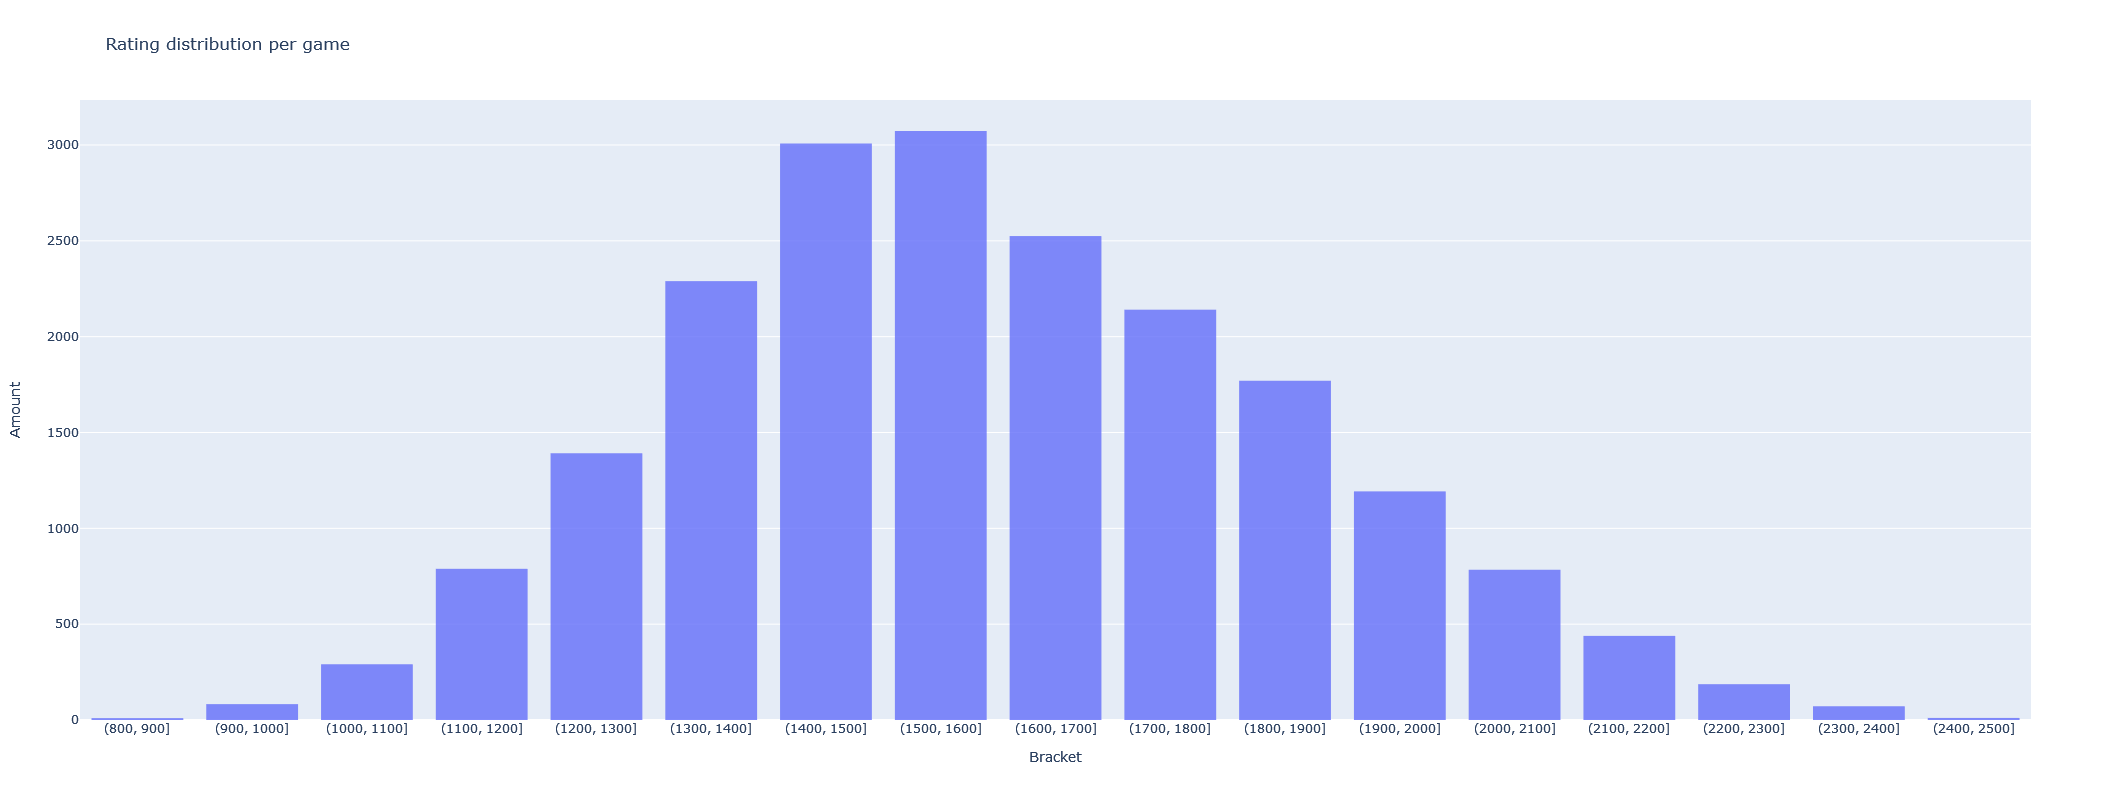

In [8]:
brackets = np.arange(800, 2501, 100)
df["bracket"] = pd.cut(df["avg_rating"], bins = brackets)
df["bracket_str"] = df["bracket"].astype(str)
fig = px.histogram(df, "bracket_str", title="Rating distribution per game", opacity=0.8, category_orders=dict(bracket_str = df["bracket"].dtype.categories.astype(str)), labels={"bracket_str":"Bracket"})
fig.update_layout(autosize=False, width=1200, height=800, yaxis_title="Amount")
fig.show()

## Matchmaking fairness

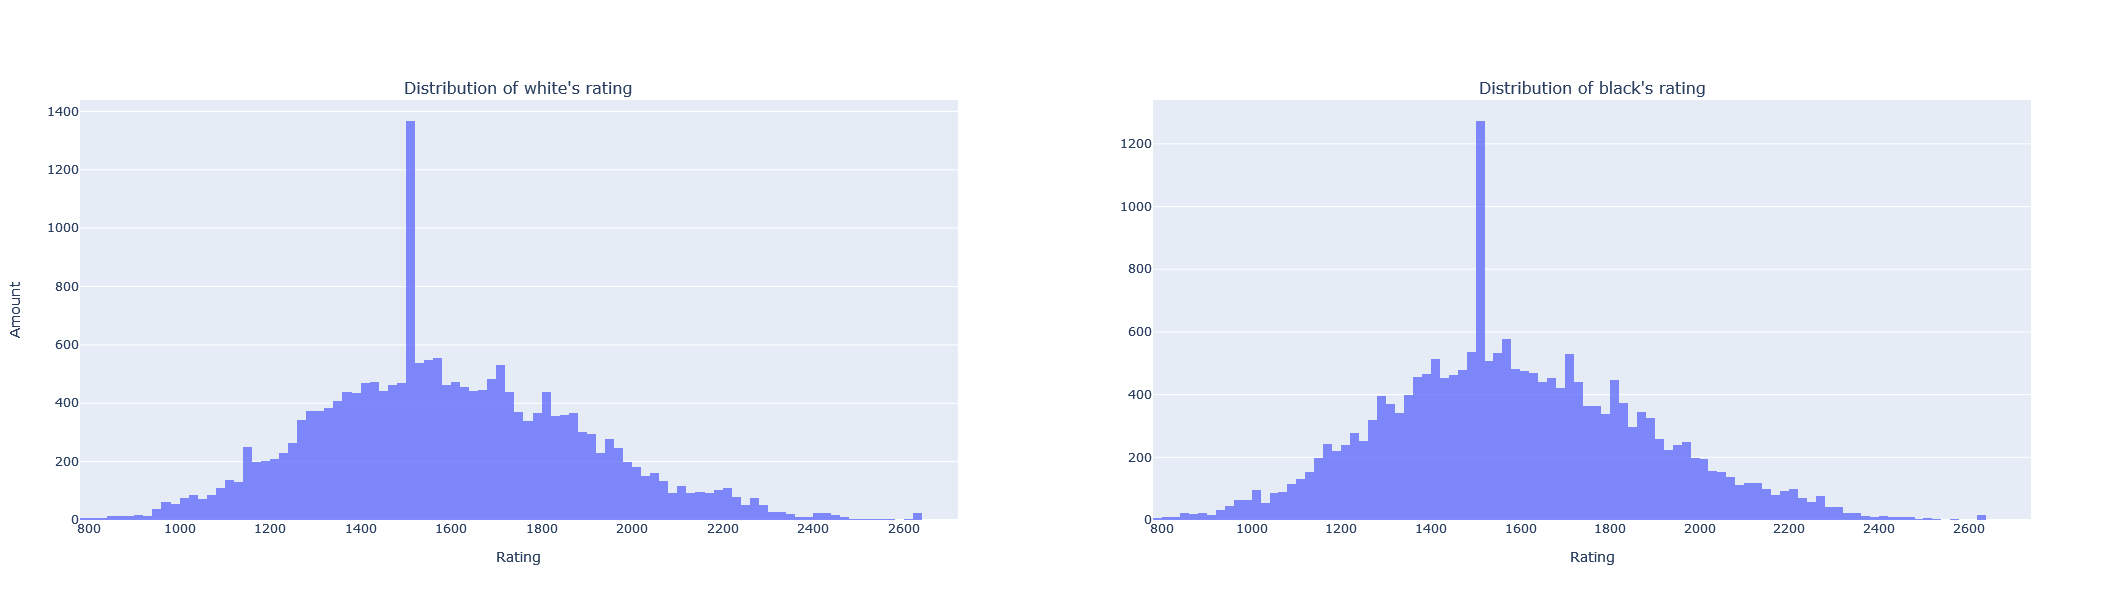

In [193]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution of white's rating", "Distribution of black's rating"))
fig.add_trace(
    px.histogram(df["white_rating"], nbins=100, opacity=0.8).data[0],
    row=1, col=1
)

fig.add_trace(
    px.histogram(df["black_rating"], nbins=100, opacity=0.8).data[0],
    row=1, col=2
)

fig['layout']['xaxis']['title'] = "Rating"
fig['layout']['yaxis']['title'] = "Amount"
fig['layout']['xaxis2']['title'] = "Rating"
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

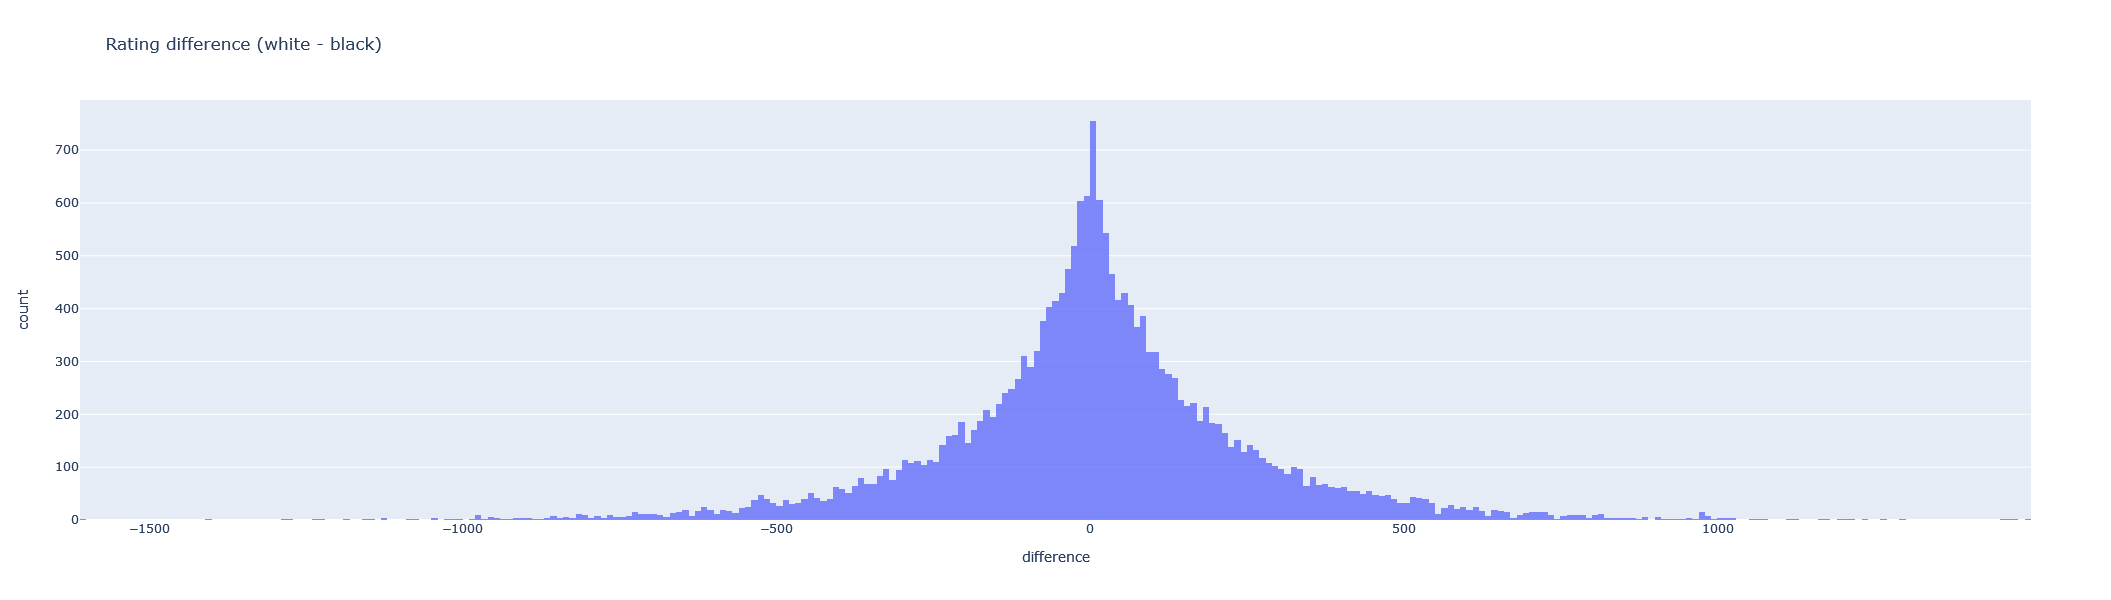

In [209]:
df["rating_diff"] = df["white_rating"] - df["black_rating"]
fig = px.histogram(df["rating_diff"], opacity=0.8, title="Rating difference (white - black)", labels={"value":"difference"})
fig.update_layout(autosize=False, width=900, height=600, showlegend=False)
fig.show()

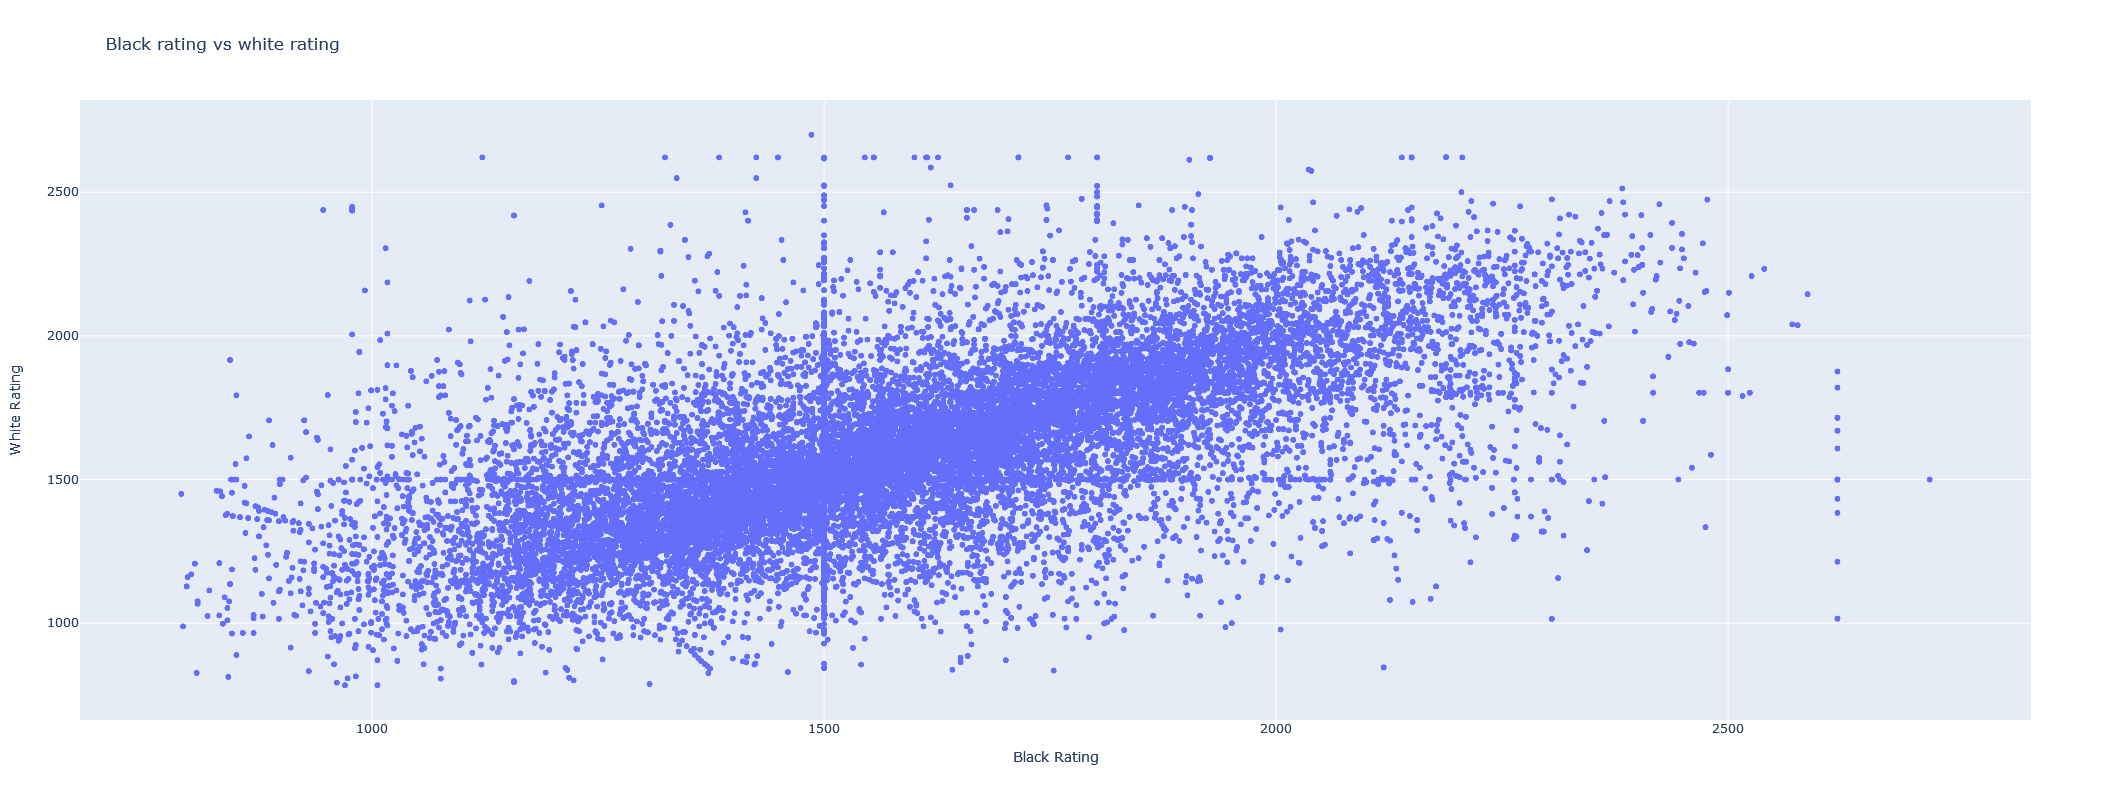

In [210]:
fig = px.scatter(df, x="black_rating", y="white_rating", labels={"white_rating":"White Rating", "black_rating":"Black Rating"}, title="Black rating vs white rating")
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

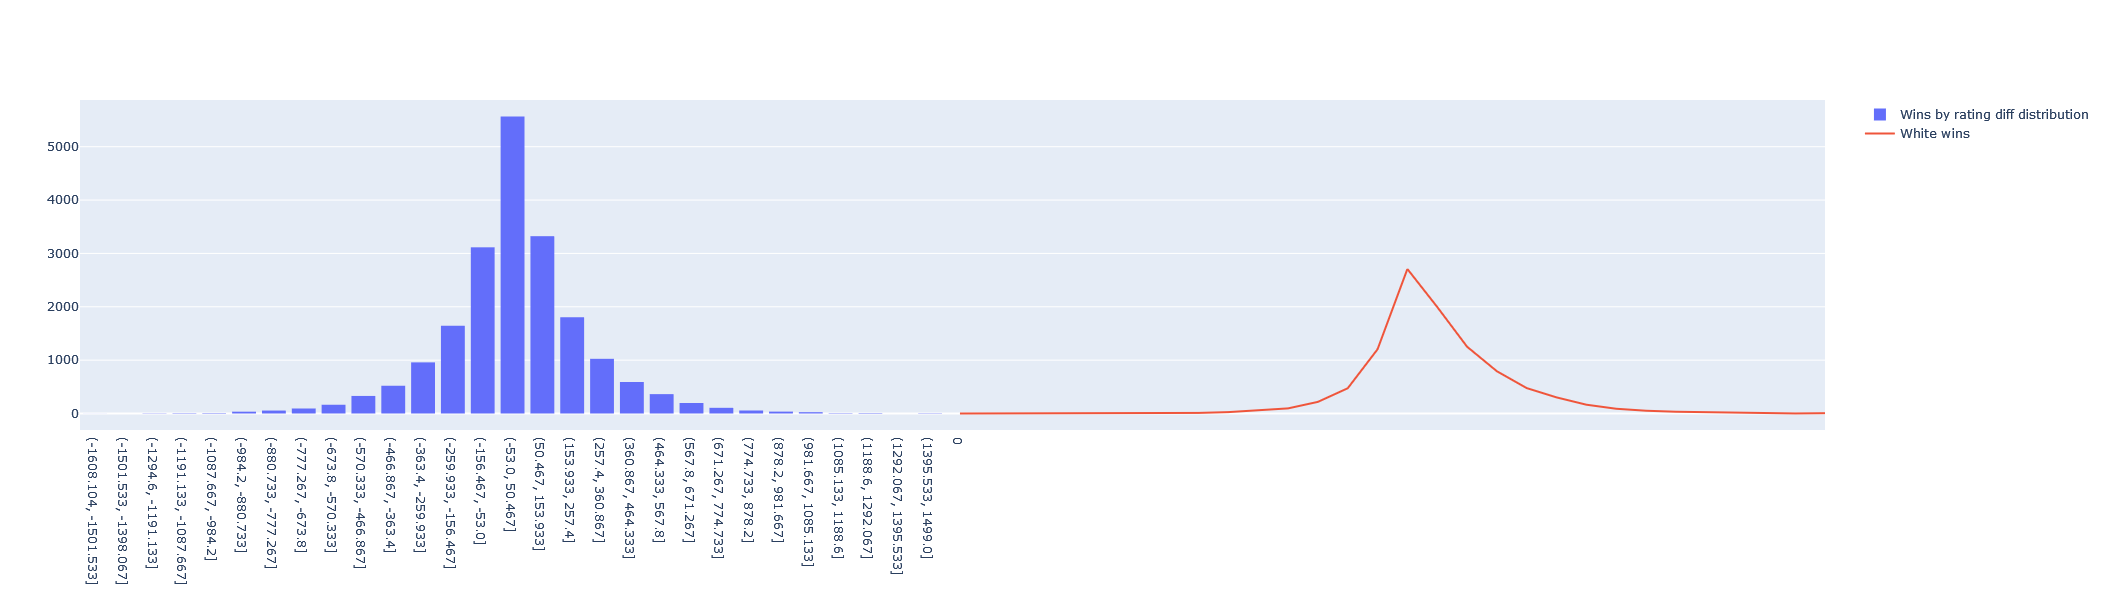

In [34]:
# DA FINIRE
df["rating_diff_cut"] = pd.cut(df["rating_diff"], bins = 30)
df["rating_diff_cut_str"] = df["rating_diff_cut"].astype(str)
ordered = df.sort_values(by="rating_diff_cut")
grouped = df.groupby(["rating_diff_cut","winner"]).size().unstack()

fig = make_subplots(1, 1)
#distr = px.histogram(df, x="rating_diff_cut_str", category_orders=dict(rating_diff_cut_str = df["rating_diff_cut"].dtype.categories.astype(str)))
distr = go.Histogram(x=ordered["rating_diff_cut_str"], name="Wins by rating diff distribution")
white = go.Scatter(y=ordered.groupby(["rating_diff_cut", "winner"]).size().unstack()["white"], mode="lines", name="White wins")
fig.add_trace(distr, row=1, col = 1)
fig.add_trace(white, row=1, col=1)
fig.update_layout(autosize=False, width=1500, height=600)
fig.show()

### Games seem to be relatively fair but there's a decent number of games where the difference is large<br>
Let's see if there's a major difference in white or black winning

As expected, if the difference is low (black side has a higher rating), that means white will be less likely to win

# Openings

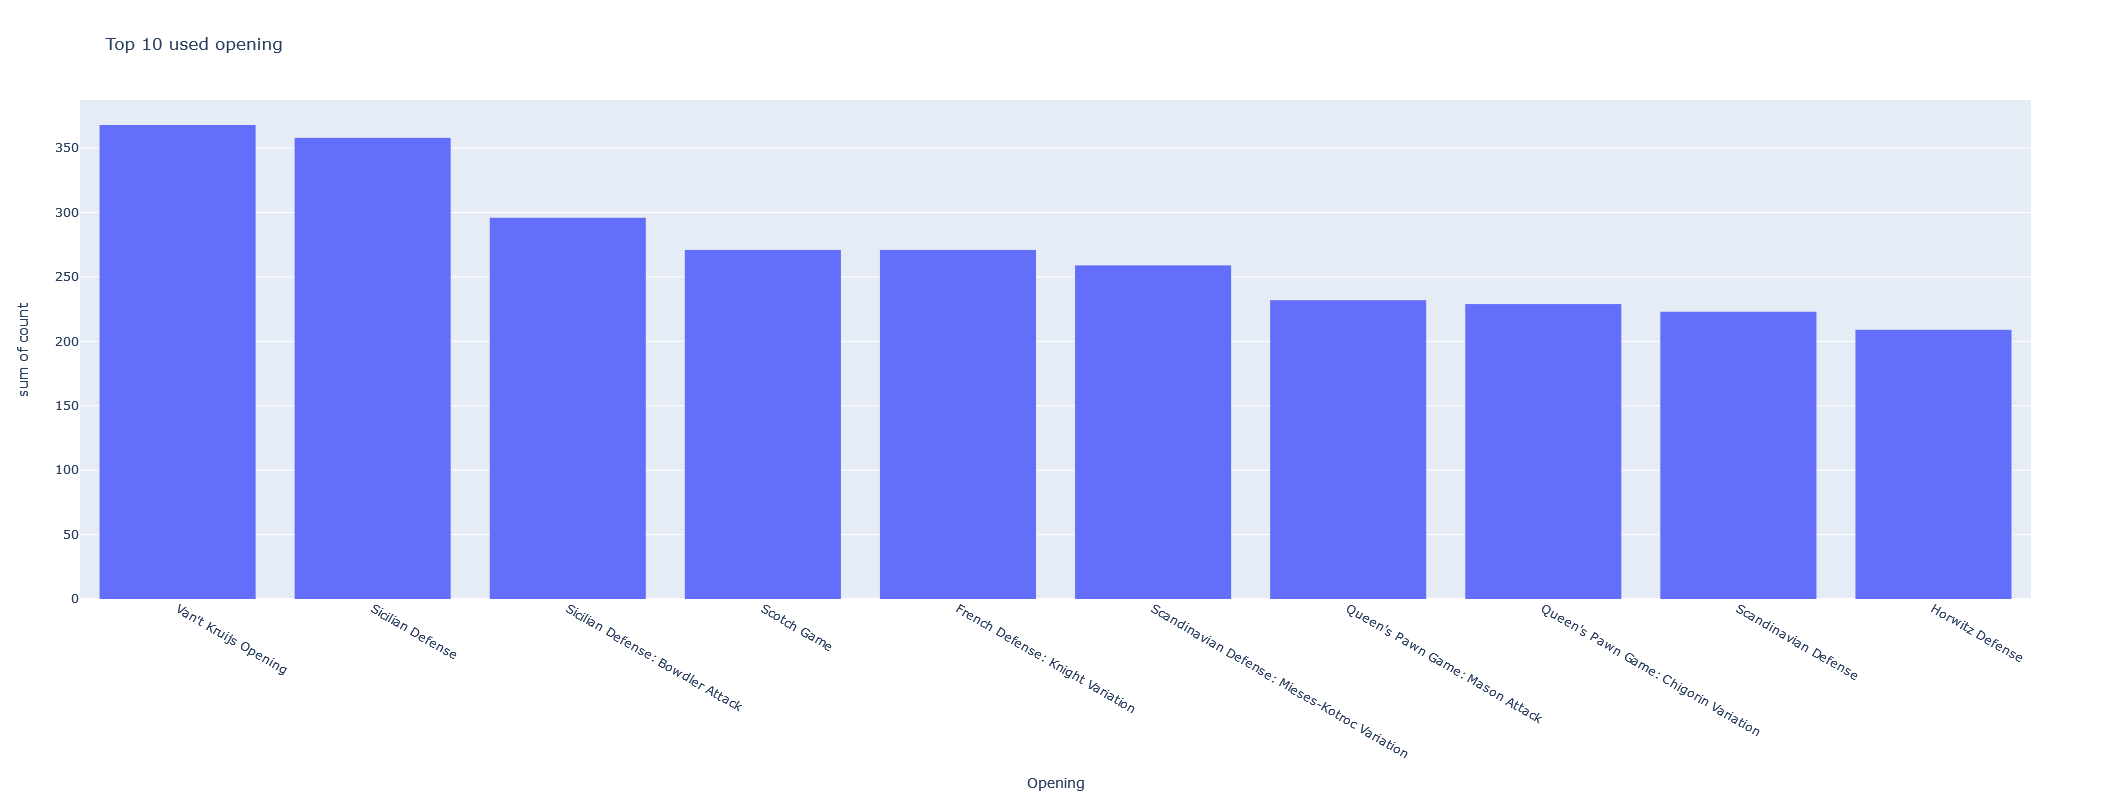

In [195]:
popOpenings = df.groupby("opening_name")["id"].count()
popOpenings = popOpenings.sort_values(ascending=False).reset_index()
popOpenings = popOpenings.iloc[0:10]
fig = px.histogram(popOpenings, x="opening_name", y="id", labels={"id":"count", "opening_name":"Opening"}, title="Top 10 used opening")
fig.update_layout(autosize=False, width=1200, height=800, showlegend=False)
fig.show()

In [107]:
openingGb = df.groupby("opening_name")["winner"].value_counts()
openingGb = openingGb.reset_index(name="wins")
openingGb = openingGb.sort_values("wins", ascending=False)
bWins = openingGb[openingGb["winner"] == "black"]
wWins = openingGb[openingGb["winner"] == "white"]

bWinsList = list(bWins.head()["opening_name"])
wWinsList = list(wWins.head()["opening_name"])
winner = list(set(bWinsList + wWinsList))
res = []
for e in winner:
    i = openingGb[openingGb["opening_name"] == e]
    i["sum"] = i["wins"].sum().astype(int)
    i["percentage"] = i["wins"] / i["sum"]
    res.append(i)
    
winProb = res[0]
for e in res[1:]:
    winProb = pd.concat([winProb, e])

<ipython-input-107-1e52bc14a21a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-1e52bc14a21a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



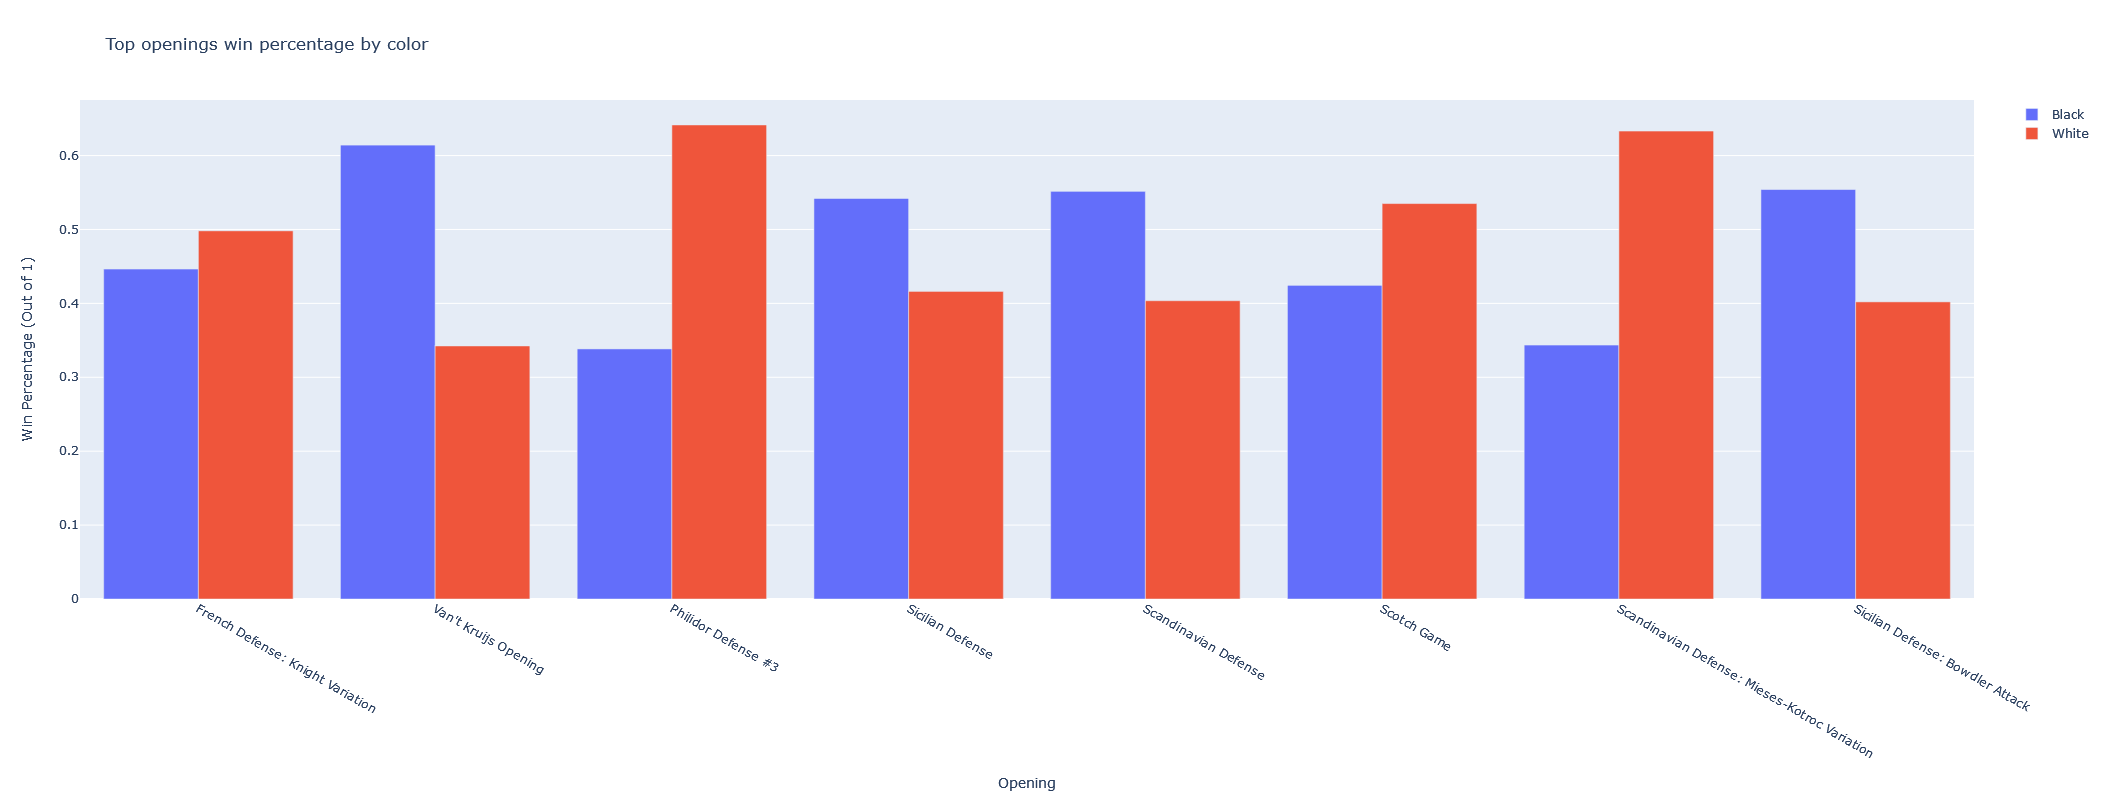

In [208]:
xB = winProb[winProb['winner'] == 'black']["opening_name"]
yB = winProb[winProb['winner'] == 'black']["percentage"]
xW = winProb[winProb['winner'] == 'white']["opening_name"]
yW = winProb[winProb['winner'] == 'white']["percentage"]

#fig = make_subplots(rows=1, cols=2, subplot_titles=("Winner: Black", "Winner: White"))
#fig.add_trace(go.Bar(x=xB, y=yB), row=1, col=1)
#fig.add_trace(go.Bar(x=xW, y=yW), row=1, col=1)
fig = go.Figure(data=[
    go.Bar(x=xB, y=yB, name="Black"),
    go.Bar(x=xW, y=yW, name="White")
])
fig.update_layout(autosize=False, width=1600, height=800, title_text="Top openings win percentage by color")
fig['layout']['xaxis']['title'] = "Opening"
fig['layout']['yaxis']['title'] = 'Win Percentage (Out of 1)'
fig.show()